In [0]:
#참고: https://programmers.co.kr/learn/courses/21/lessons/1695

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# %matplotlib inline 설정을 해주어야지만 노트북 안에 그래프가 디스플레이 된다.
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(stopwords = STOPWORDS, 
                          background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#data출처: https://www.kaggle.com/c/word2vec-nlp-tutorial/data
from gensim.test.utils import datapath, get_tmpfile
train_file = datapath('/content/gdrive/My Drive/AI/kaggle/' + 'labeledTrainData.tsv') 


In [20]:
import pandas as pd

# 레이블인 sentiment가 있는 학습 데이터
train_data = pd.read_csv(train_file,  header=0, delimiter='\t', quoting=3)
print(train_data)

              id  sentiment                                             review
0       "5814_8"          1  "With all this stuff going down at the moment ...
1       "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2       "7759_3"          0  "The film starts with a manager (Nicholas Bell...
3       "3630_4"          0  "It must be assumed that those who praised thi...
4       "9495_8"          1  "Superbly trashy and wondrously unpretentious ...
...          ...        ...                                                ...
24995   "3453_3"          0  "It seems like more consideration has gone int...
24996   "5064_1"          0  "I don't believe they made this film. Complete...
24997  "10905_3"          0  "Guy is a loser. Can't get girls, needs to bui...
24998  "10194_3"          0  "This 30 minute documentary Buñuel made in the...
24999   "8478_8"          1  "I saw this movie as a child and it broke my h...

[25000 rows x 3 columns]


In [22]:
from bs4 import BeautifulSoup
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
def review_to_words( raw_review ):
    # 1. HTML 제거
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. 영문자가 아닌 문자는 공백으로 변환
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. 소문자 변환
    words = letters_only.lower().split()
    # 4. 파이썬에서는 리스트보다 세트로 찾는 게 훨씬 빠르다.
    # stopwords 를 세트로 변환한다.
    stops = set(stopwords.words('english'))
    # 5. Stopwords 불용어 제거
    meaningful_words = [w for w in words if not w in stops]
    # 6. 어간추출
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. 공백으로 구분된 문자열로 결합하여 결과를 반환
    return( ' '.join(stemming_words) )

for idx, review in enumerate(train_data['review']):
    clean_review_data = review_to_words(review)
    train_data['review'][idx] = clean_review_data
print(train_data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


              id  sentiment                                             review
0       "5814_8"          1  stuff go moment mj start listen music watch od...
1       "2381_9"          1  classic war world timothi hine entertain film ...
2       "7759_3"          0  film start manag nichola bell give welcom inve...
3       "3630_4"          0  must assum prai film greatest film opera ever ...
4       "9495_8"          1  superbl trashi wondrous unpretenti exploit hoo...
...          ...        ...                                                ...
24995   "3453_3"          0  seem like consider gone imdb review film went ...
24996   "5064_1"          0  believ made film complet unnecessari first fil...
24997  "10905_3"          0  guy loser get girl need build pick stronger su...
24998  "10194_3"          0  minut documentari bu uel made earli one spain ...
24999   "8478_8"          1  saw movi child broke heart stori unfinish end ...

[25000 rows x 3 columns]


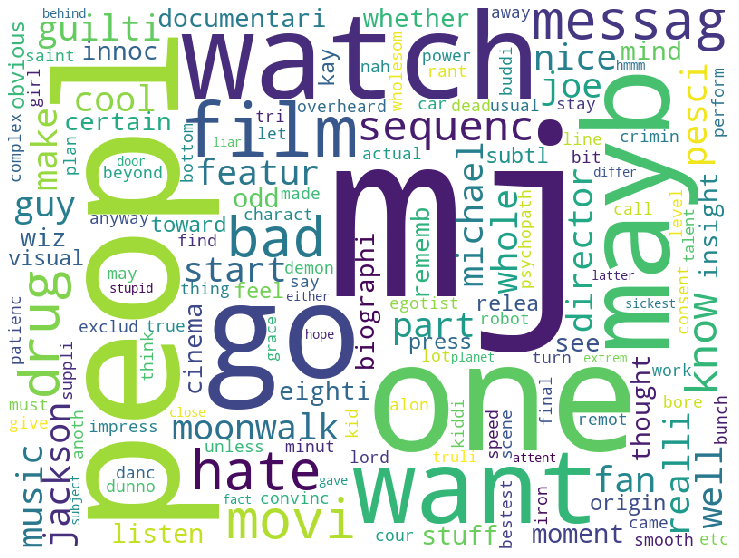

CPU times: user 1.31 s, sys: 44.9 ms, total: 1.36 s
Wall time: 1.37 s


In [24]:
%time displayWordCloud( train_data['review'][0])

In [25]:
# 단어 수
train_data['num_words'] = train_data['review'].apply(lambda x: len(str(x).split()))
# 중복을 제거한 단어 수
train_data['num_uniq_words'] = train_data['review'].apply(lambda x: len(set(str(x).split())))

# 단어 수
# train['num_words'] = len(str(clean_review_data).split())
# # 중복을 제거한 단어 수
# train['num_uniq_words'] = len(set(str(clean_review_data).split()))

print(train_data)

              id  sentiment  ... num_words  num_uniq_words
0       "5814_8"          1  ...       219             156
1       "2381_9"          1  ...        83              62
2       "7759_3"          0  ...       239             200
3       "3630_4"          0  ...       189             158
4       "9495_8"          1  ...       210             188
...          ...        ...  ...       ...             ...
24995   "3453_3"          0  ...        42              38
24996   "5064_1"          0  ...        97              77
24997  "10905_3"          0  ...        59              45
24998  "10194_3"          0  ...        99              76
24999   "8478_8"          1  ...        78              62

[25000 rows x 5 columns]


In [26]:
# 첫 번째 리뷰에 
x = train_data['review'][0]
x = str(x).split()
print(len(x))
x[:10]

219


['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

리뷰 별 단어 평균값 : 119.44432
리뷰 별 단어 중간값 88.0
리뷰 별 고유 단어 평균값 : 93.972
리뷰 별 고유 단어 중간값 74.0


Text(0.5, 1.0, 'reivew, UNIQ word distribution')

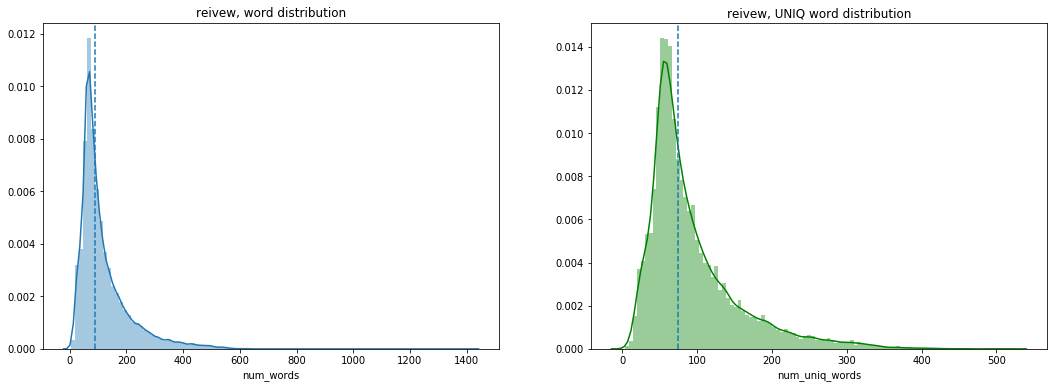

In [29]:
import seaborn as sns

fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(18, 6)
print('리뷰 별 단어 평균값 :', train_data['num_words'].mean())
print('리뷰 별 단어 중간값', train_data['num_words'].median())
sns.distplot(train_data['num_words'], bins=100, ax=axes[0])
axes[0].axvline(train_data['num_words'].median(), linestyle='dashed')
axes[0].set_title('reivew, word distribution')

print('리뷰 별 고유 단어 평균값 :', train_data['num_uniq_words'].mean())
print('리뷰 별 고유 단어 중간값', train_data['num_uniq_words'].median())
sns.distplot(train_data['num_uniq_words'], bins=100, color='g', ax=axes[1])
axes[1].axvline(train_data['num_uniq_words'].median(), linestyle='dashed')
axes[1].set_title('reivew, UNIQ word distribution')